<a href="https://colab.research.google.com/github/Vinayak-Sharma12/ML-Algorithms/blob/main/Decision_Tree_Regressor_for_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Problem State: Various Features are given and on the basis of that we need to predict the Price of the Laptop**

## **1. Import Libararies**

In [43]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt


## **2. Import Dataset**

In [44]:
df=pd.read_csv("/content/laptop.csv")

In [45]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,CpuCompany,ClockSpeed,Flash Storage,HDD,Hybrid,SSD,GPU,Ppi,Price
0,Apple,Ultrabook,8,macOS,1.37,0,Intel,2.3,0.000,0.0,0.0,0.128,Intel,312.781955,71378.6832
1,Apple,Ultrabook,8,macOS,1.34,0,Intel,1.8,0.128,0.0,0.0,0.000,Intel,175.939850,47895.5232
2,HP,Notebook,8,No,1.86,0,Intel,2.5,0.000,0.0,0.0,0.256,Intel,192.307692,30636.0000
3,Apple,Ultrabook,16,macOS,1.83,0,Intel,2.7,0.000,0.0,0.0,0.512,AMD,303.896104,135195.3360
4,Apple,Ultrabook,8,macOS,1.37,0,Intel,3.1,0.000,0.0,0.0,0.256,Intel,312.781955,96095.8080


In [46]:
X=df.iloc[:,:-1]

In [47]:
X.head()

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,CpuCompany,ClockSpeed,Flash Storage,HDD,Hybrid,SSD,GPU,Ppi
0,Apple,Ultrabook,8,macOS,1.37,0,Intel,2.3,0.000,0.0,0.0,0.128,Intel,312.781955
1,Apple,Ultrabook,8,macOS,1.34,0,Intel,1.8,0.128,0.0,0.0,0.000,Intel,175.939850
2,HP,Notebook,8,No,1.86,0,Intel,2.5,0.000,0.0,0.0,0.256,Intel,192.307692
3,Apple,Ultrabook,16,macOS,1.83,0,Intel,2.7,0.000,0.0,0.0,0.512,AMD,303.896104
4,Apple,Ultrabook,8,macOS,1.37,0,Intel,3.1,0.000,0.0,0.0,0.256,Intel,312.781955


In [48]:
Y=df.iloc[:,-1]

In [49]:
Y.head()

,Price
0,71378.6832
1,47895.5232
2,30636.0000
3,135195.3360
4,96095.8080


## **3. Encoding Categorical Columns**

In [50]:
categorical_cols = X.select_dtypes(include='object').columns
categorical_cols

Index(['Company', 'TypeName', 'OpSys', 'CpuCompany', 'GPU'], dtype='object')

***Apply One Hot Encoding***

In [51]:
X=pd.get_dummies(X, columns=categorical_cols, drop_first=True)


In [53]:
X.head()

,Ram,Weight,Touchscreen,ClockSpeed,Flash Storage,HDD,Hybrid,SSD,Ppi,Company_Apple,...,OpSys_Linux,OpSys_Mac,OpSys_No,OpSys_Windows,OpSys_macOS,CpuCompany_Intel,CpuCompany_Samsung,GPU_ARM,GPU_Intel,GPU_Nvidia
0,8,1.37,0,2.3,0.000,0.0,0.0,0.128,312.781955,True,...,False,False,False,False,True,True,False,False,True,False
1,8,1.34,0,1.8,0.128,0.0,0.0,0.000,175.939850,True,...,False,False,False,False,True,True,False,False,True,False
2,8,1.86,0,2.5,0.000,0.0,0.0,0.256,192.307692,False,...,False,False,True,False,False,True,False,False,True,False
3,16,1.83,0,2.7,0.000,0.0,0.0,0.512,303.896104,True,...,False,False,False,False,True,True,False,False,False,False
4,8,1.37,0,3.1,0.000,0.0,0.0,0.256,312.781955,True,...,False,False,False,False,True,True,False,False,True,False


*Note:Scikit-learn automatically converts True/False to 1/0.*

## **4. Train Test Split**

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [55]:
x_train.head()

,Ram,Weight,Touchscreen,ClockSpeed,Flash Storage,HDD,Hybrid,SSD,Ppi,Company_Apple,...,OpSys_Linux,OpSys_Mac,OpSys_No,OpSys_Windows,OpSys_macOS,CpuCompany_Intel,CpuCompany_Samsung,GPU_ARM,GPU_Intel,GPU_Nvidia
853,8,1.96,0,2.8,0.0,0.0,0.0,0.256,214.285714,False,...,False,False,False,True,False,True,False,False,False,True
916,8,1.49,0,2.5,0.0,0.0,0.0,0.256,225.563910,False,...,False,False,False,True,False,True,False,False,True,False
1034,8,1.84,0,2.5,0.0,0.0,0.0,0.256,192.307692,False,...,False,False,False,True,False,True,False,False,True,False
912,6,2.20,0,2.7,0.0,0.0,0.0,0.256,192.307692,False,...,False,False,False,True,False,True,False,False,False,True
252,4,1.68,0,3.0,0.0,1.0,0.0,0.000,136.794872,False,...,False,False,False,True,False,False,False,False,False,False


In [56]:
y_train.head()

,Price
853,101391.8400
916,51148.8000
1034,65480.5872
912,42037.9200
252,24988.3200


In [57]:
x_test.head()

,Ram,Weight,Touchscreen,ClockSpeed,Flash Storage,HDD,Hybrid,SSD,Ppi,Company_Apple,...,OpSys_Linux,OpSys_Mac,OpSys_No,OpSys_Windows,OpSys_macOS,CpuCompany_Intel,CpuCompany_Samsung,GPU_ARM,GPU_Intel,GPU_Nvidia
580,4,1.45,0,1.1,0.0,0.0,0.0,0.032,214.285714,False,...,False,False,False,True,False,True,False,False,True,False
1017,16,2.40,0,2.7,0.0,0.0,0.0,0.512,346.820809,False,...,False,False,False,True,False,True,False,False,False,True
761,16,1.18,0,2.8,0.0,0.0,0.0,0.256,240.000000,False,...,False,False,False,True,False,True,False,False,True,False
686,4,1.86,0,2.5,0.0,0.5,0.0,0.000,136.794872,False,...,False,False,False,True,False,True,False,False,False,False
186,16,2.06,1,2.8,0.0,0.0,0.0,0.512,384.615385,False,...,False,False,False,True,False,True,False,False,False,True


In [58]:
y_test.head()

,Price
580,20725.9200
1017,158135.0400
761,99047.5200
686,32639.8608
186,127712.1600


### **Important Note:Feature Scaling is not usually required in D.T**
###  **Because**
    Decision Tree doesn’t need scaling because it only checks whether a value is bigger or smaller than a number — not how big it is.

    Even simpler:

    It only asks:
    “Is this value ≤ some threshold?”

    Not:
    “How far is this value?” or “How large is this value?”

    That’s why scaling doesn’t matter.

## **5. Hyper-Parameter Tuning**

In [59]:
param_grid = {
    'criterion': ['squared_error'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

**Intialize Grid Search CV(cross-validation)**

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
dt_regressor = DecisionTreeRegressor(random_state=0)
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [61]:
best_params = grid_search.best_params_
print("Best parameters found:", best_params)

Best parameters found: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


## **6. Training the Model**

In [62]:
dt_regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

## **7. Evaluate the Model**

In [64]:
y_pred = dt_regressor.predict(x_test)

In [65]:
y_pred

array([ 13266.72  , 135195.336 ,  98301.6   ,  25840.8   , 108020.9376,
        37725.4368,  22697.28  ,  17316.    ,  65510.9568,  69530.4   ,
       108744.48  ,  33886.08  ,  12201.12  ,  74538.72  , 149184.    ,
        46353.6   ,  53386.56  , 114731.5536,  95850.72  , 105228.    ,
        17805.9096,  87858.72  ,  39533.76  ,  78534.72  ,  34045.3872,
        28504.8   ,  29783.52  ,  45282.672 ,  42943.1472,  69210.72  ,
        63669.6   ,  38378.6496,  78588.    ,  42570.72  , 138474.72  ,
        78268.32  , 110017.872 ,  23389.92  ,  71928.    ,  72940.32  ,
        79813.44  ,  63499.104 , 324954.72  ,  55890.72  ,  68145.12  ,
        26053.92  ,  67772.16  ,  48484.8   ,  58075.2   ,  25515.2592,
        39906.72  , 133146.72  ,  53386.56  ,  35111.52  ,  40705.92  ,
        63243.36  ,  22324.32  ,  62938.0656,  63499.104 , 104587.5744,
        58554.72  ,  15339.312 ,  36709.92  ,  99580.32  ,  82397.52  ,
        98301.6   ,  42304.32  ,  71874.72  ,  34045.92  ,  8439

In [68]:
from sklearn import metrics
import numpy as np

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Absolute Error (MAE): 13679.93
Mean Squared Error (MSE): 460622993.63
Root Mean Squared Error (RMSE): 21462.13
R-squared (R2): 0.70


## **7. Draw Decision Tree for the classifier** **bold text**

[Text(0.6425886466231046, 0.975, 'x[0] <= 14.0\nsquared_error = 1521223825.043\nsamples = 326\nvalue = 63882.089'),
 Text(0.34839432237629686, 0.925, 'x[0] <= 7.0\nsquared_error = 748105137.66\nsamples = 258\nvalue = 51537.209'),
 Text(0.4954914844997007, 0.95, 'True  '),
 Text(0.1382743914604948, 0.875, 'x[3] <= 2.25\nsquared_error = 139540479.624\nsamples = 94\nvalue = 30082.16'),
 Text(0.10463637270550678, 0.825, 'x[7] <= 0.192\nsquared_error = 87583135.279\nsamples = 46\nvalue = 23995.702'),
 Text(0.07200219473264166, 0.775, 'x[1] <= 1.16\nsquared_error = 67251241.905\nsamples = 43\nvalue = 22684.902'),
 Text(0.04918196328810854, 0.725, 'x[32] <= 0.5\nsquared_error = 63872064.0\nsamples = 2\nvalue = 43103.52'),
 Text(0.045989624900239424, 0.675, 'squared_error = 0.0\nsamples = 1\nvalue = 51095.52'),
 Text(0.052374301675977654, 0.675, 'squared_error = 0.0\nsamples = 1\nvalue = 35111.52'),
 Text(0.09482242617717478, 0.725, 'x[7] <= 0.08\nsquared_error = 46086444.083\nsamples = 41\nva

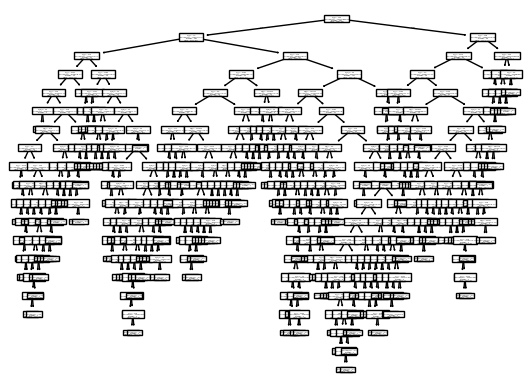

In [69]:
from sklearn import tree

tree.plot_tree(dt_regressor.fit(x_test, y_test))

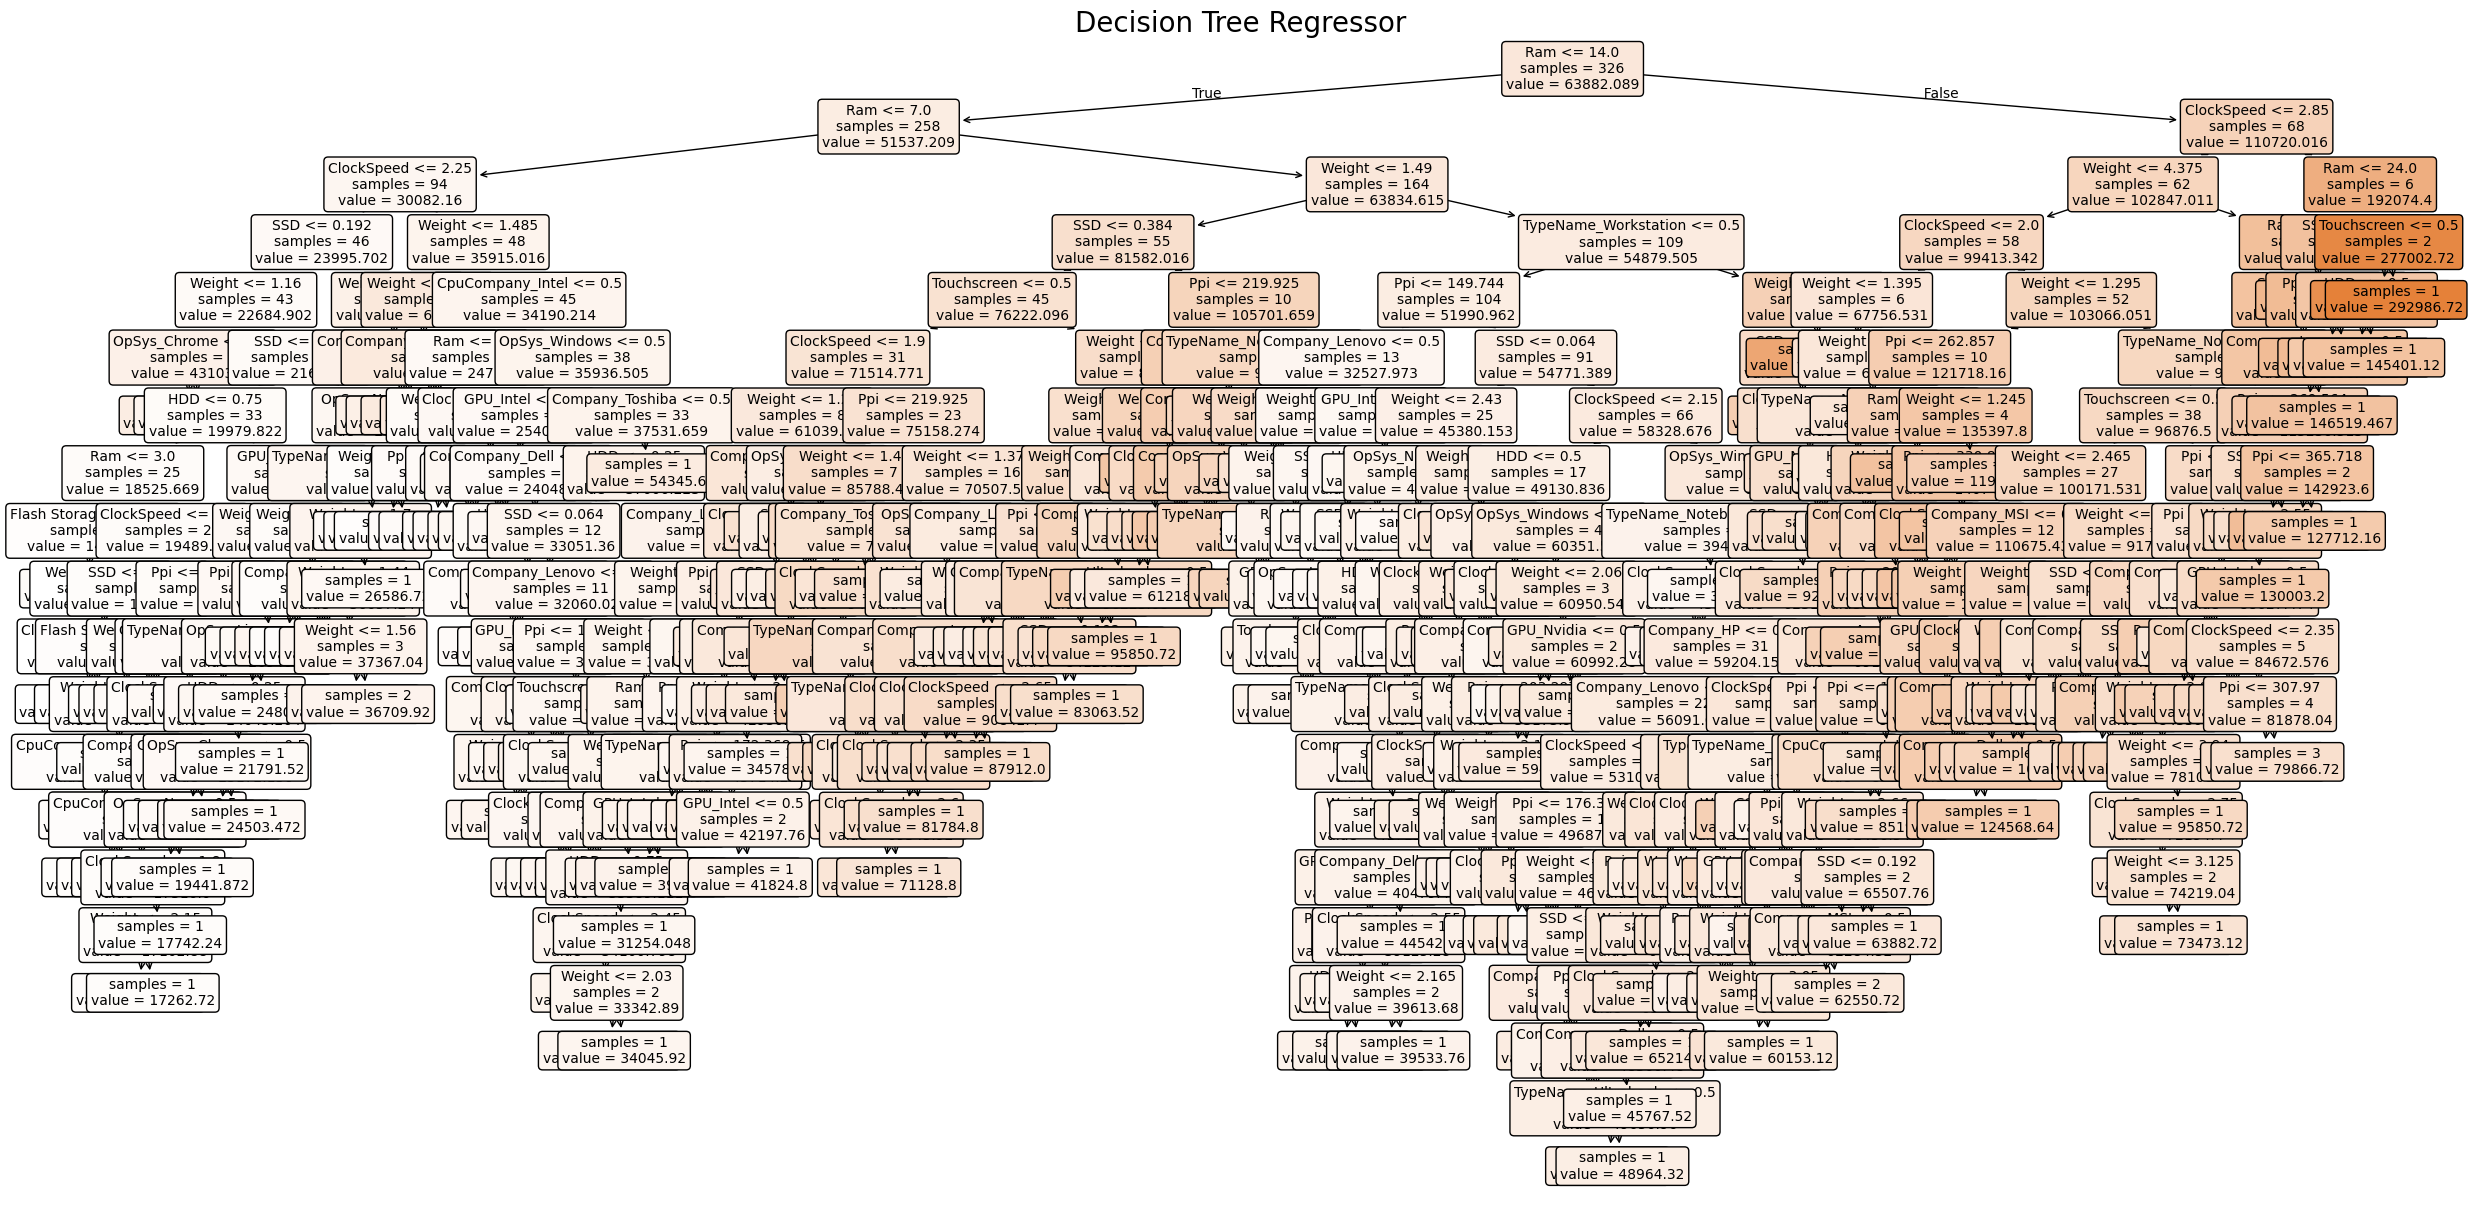

In [72]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 15)) # Increased figure size for better visibility
plot_tree(
    dt_regressor,
    feature_names=x_train.columns.tolist(),
    impurity=False,
    filled=True,
    rounded=True,
    fontsize=10 # Adjust font size if needed
)
plt.title('Decision Tree Regressor', fontsize=20) # Add a title
plt.show()